<a href="https://colab.research.google.com/github/Anirbit-AI/Expositions-With-PyTorch/blob/main/sigmoid_grok_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt


import torch
import torch.nn as nn
import torch.optim as optim

import seaborn as sb

# Color palette
colors = sb.color_palette('viridis_r', 3)

# Plot style
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 300
})

#Data and MSE on Sigmoid

In [12]:
x1 = 1
x2 = -1
x3 = 2
x4 = -2
y1 = 5
y2 = 5
y3 = 10
y4 = 10

#We need 2 versions of the function to be defined
#- one that can handle tensor inputs for optimization
#- one that can be used by matplotlib which only deals with numpy arrays

sigma_torch = lambda z : (1 + torch.exp(-z))**(-1)
sigma_np = lambda z :  (1 + np.exp(-z))**(-1)


L = 0.001 #regularization

f_torch = lambda w: (1/4)*( (0.5)*(y4- 1/(1+torch.exp(-(w*x4))))**2 + (0.5)*(y3 - 1/(1+torch.exp(-(w*x3))))**2 + (0.5)*(y1 - 1/(1+torch.exp(-(w*x1))))**2 + (0.5)*(y2 - 1/(1+torch.exp(-w*x2)))**2)  + (L/2)*(w**2)
f_np = lambda w: (1/4)*( (0.5)*(y4 - 1/(1+np.exp(-(w*x4))))**2 + (0.5)*(y3 - 1/(1+np.exp(-(w*x3))))**2 + (0.5)*(y1 - 1/(1+np.exp(-(w*x1))))**2 + (0.5)*(y2 - 1/(1+np.exp(-w*x2)))**2) + (L/2)*(w**2)


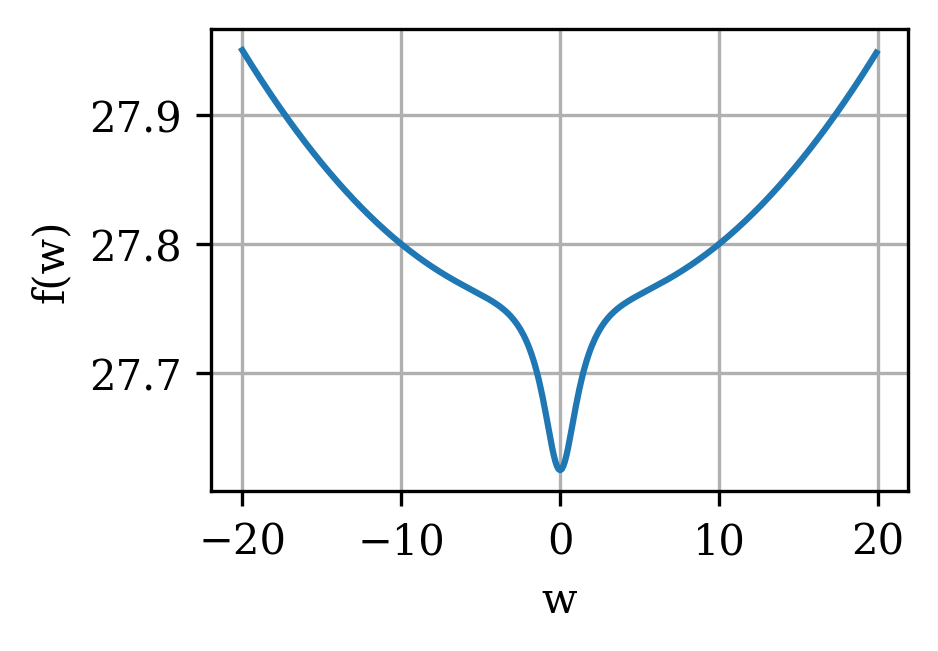

In [13]:
domain = torch.arange(-20.0, 20.0, 0.1)

plt.figure(figsize=(3, 2))
plt.plot(domain, f_torch(domain))
plt.xlabel('w')
plt.ylabel('f(w)')
plt.grid()

#Doing GD

In [14]:
eta = 5*10**(-1) #step-length
d = 1 #domain dimension of the function
steps  = int(2*10**3)


gap = 1 #after how many steps the progress is recorded
noise = 0.0 #switching the above to 0 will stop noise addition in the gradient

w_data = (5)*torch.ones((d, )) + 0.01*torch.randn((d, ))
#algorithm initialized to a weighted combination of the all-ones vector and a random-normal sample
w_data.requires_grad_(True)
#tells PyTorch that we shall take derivatives w.r.t x_data

optimizer = optim.SGD([w_data], eta)
#optimizer will take the gradient of the function it is called on at x_data
#-this way we shall be using the inbuilt SGD functionality to compute gradients of our function whose minima we are seeking.

trajectory_w = []
loss_t = []
#the above lists will store the sequence of points and losses through which the algorithm travels

for iter in range(steps):
    out = f_torch(w_data)
    #out evaluates the target function at the current location x_data
    if iter % gap == 0 or iter == steps-1:
        trajectory_w.append(np.array(w_data.data[0]))
        loss_t.append(out.data[0])
        #Recall that x_data is a PyTorch tensor - so that needs a bit of a careful handling!
        #x_data.data[0] is a PyTorch technicality to ensure we are exacting only the numerical information contained in x_data
        #i.e the current coordinate of the algorithm.
        #(x_data being a PyTorch tensor has a whole lot of other stuff in it too.)


    optimizer.zero_grad()
    #this is a PyTorch technicality to remove any information about previous gradients
    out.backward()
    #This computes the derivative df/dw at w = w_data and assigns the gradient value to an internal variable called w_data.grad

    w_data.grad.add_(noise * torch.randn_like(w_data))
    #add a random Normal noise (scaled by the coefficient "noise") to the current gradient stored at w_data.grad

    optimizer.step()
    #This does the update of w_{t+1} = w_t - eta * w_data.grad
    #w_data changes to w_{t+1}

#Plot

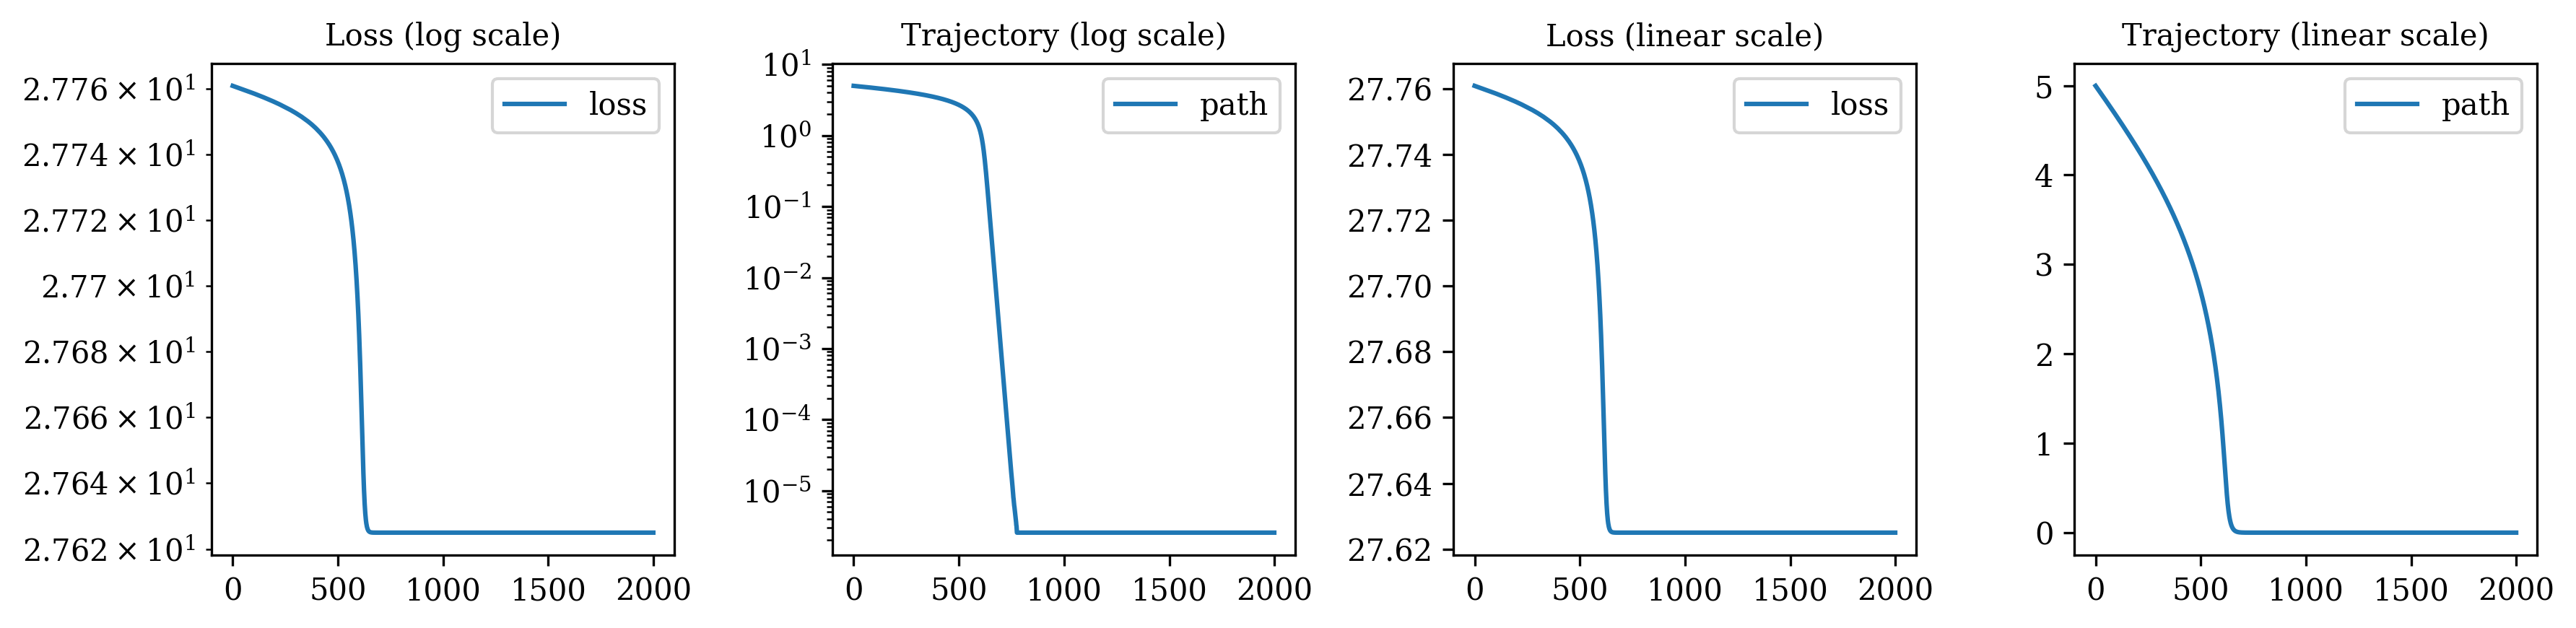

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3))  # 1 row, 2 columns

# loss_t with log scale
ax1.plot(loss_t, label="loss")
ax1.set_yscale('log')
ax1.set_title("Loss (log scale)")
ax1.legend()

#trajectory_x with log scale
ax2.plot(trajectory_w, label="path")
ax2.set_yscale('log')
ax2.set_title("Trajectory (log scale)")
ax2.legend()

ax3.plot(loss_t, label="loss")
ax3.set_title("Loss (linear scale)")
ax3.legend()

#trajectory_x with linear scale
ax4.plot(trajectory_w, label="path")
ax4.set_title("Trajectory (linear scale)")
ax4.legend()

plt.tight_layout()
plt.show()